In [4]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline
import statistics

In [2]:
data=pd.read_csv('/Users/max/Downloads/NETOLOGY/Statistics/лабораторная работа/auto.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [40]:
data['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-nu

In [6]:
dt = data.describe()

In [22]:
headers = list(dt.columns.values)
print(headers)

['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [23]:
for header in headers:
    print(header)
    print('Среднее: ', statistics.mean(data[header]))
    print('Медиана: ', statistics.median(data[header]))
    print('Min: ', min(data[header]))
    print('Max: ', max(data[header]))
    print('Ср. отклонение: ', statistics.pstdev(data[header]))

symboling
Среднее:  0.8341463414634146
Медиана:  1
Min:  -2
Max:  3
Ср. отклонение:  1.242265781250978
normalized-losses
Среднее:  126.36585365853658
Медиана:  122
Min:  65
Max:  256
Ср. отклонение:  35.35185930016389
wheel-base
Среднее:  98.75658536585365
Медиана:  97.0
Min:  86.6
Max:  120.9
Ср. отклонение:  6.007070472147536
length
Среднее:  174.04926829268294
Медиана:  173.2
Min:  141.1
Max:  208.1
Ср. отклонение:  12.307160792874916
width
Среднее:  65.90780487804878
Медиана:  65.5
Min:  60.3
Max:  72.3
Ср. отклонение:  2.1399652518208323
height
Среднее:  53.72487804878049
Медиана:  54.1
Min:  47.8
Max:  59.8
Ср. отклонение:  2.437554874380412
curb-weight
Среднее:  2555.5658536585365
Медиана:  2414
Min:  1488
Max:  4066
Ср. отклонение:  519.4086992752507
engine-size
Среднее:  126.90731707317073
Медиана:  120
Min:  61
Max:  326
Ср. отклонение:  41.54100172732021
bore
Среднее:  3.3248780487804876
Медиана:  3.31
Min:  2.54
Max:  3.94
Ср. отклонение:  0.2723817438746451
stroke
Среднее:

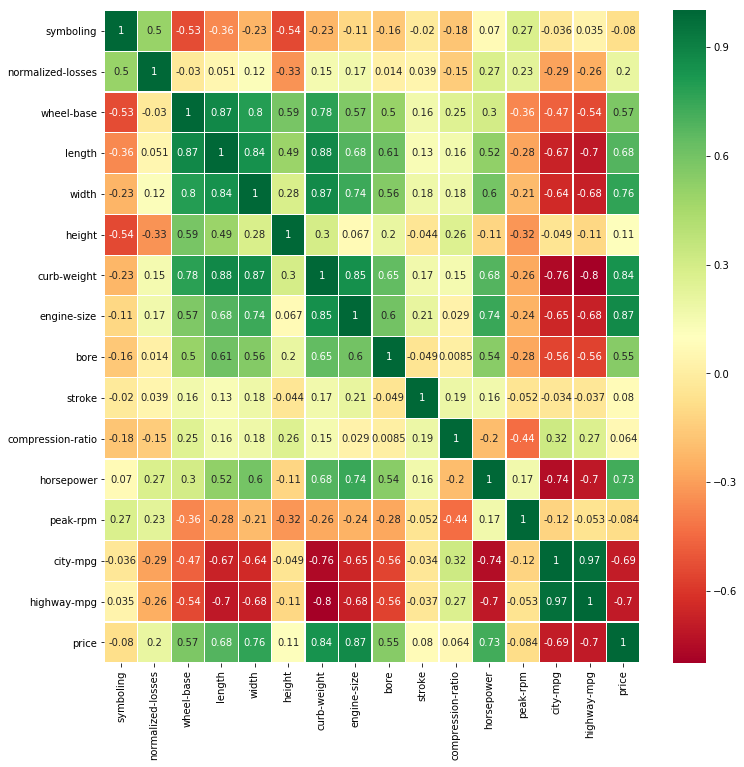

In [24]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

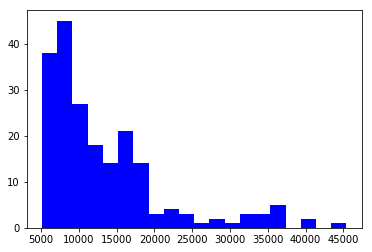

In [27]:
n, bins, patches = plt.hist(data['price'], 20, facecolor='b')

In [29]:
data['price'].skew()

1.7663998888191028

In [31]:
from scipy.stats import kurtosis
kurtosis(data['price'])

2.848082544390688

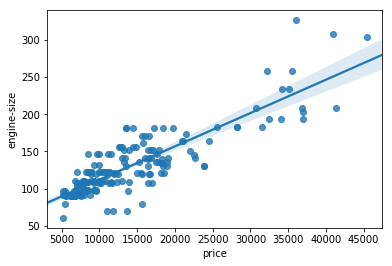

In [32]:
sns.regplot(x= data['price'], y=data['engine-size'],data=data, fit_reg=True)
plt.show()

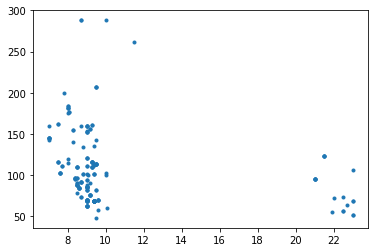

In [35]:
plt.scatter(data['compression-ratio'], data['horsepower'], marker='.')

In [39]:
disel_power = data[data['fuel-type'] == 'diesel']['horsepower']
stats.ttest_1samp(disel_power, data['horsepower'].mean())

Ttest_1sampResult(statistic=-3.721054271709646, pvalue=0.001448517106530706)

Нулевая гипотеза: две выборки не отличимы.
p-value почти равно нулю, значит вероятность ошибки отвержения нулевой гипотезы равна почти нулю(меньше 0.05), сл-но отвергаем нулевую гипотезу и считаем что выборки статистически различны.

In [44]:
cylinders = data[data['num-of-cylinders'] == 'six']['compression-ratio']
stats.ttest_1samp(cylinders, data['compression-ratio'].mean())

Ttest_1sampResult(statistic=-1.1890408670241976, pvalue=0.2465551474425633)

Нулевая гипотеза: две выборки не отличимы.
p-value 24%, значит вероятность ошибки отвержения нулевой гипотезы значительно больше чем 0.05%, сл-но принимаем нулевую гипотезу и считаем что выборки статистически схожи. И в действительности количество цилиндров в двигателе не влияет на коэффициент компрессии.